<a href="https://colab.research.google.com/github/thenameisjuh/PT-Linguistic-Bias-Detector/blob/main/PT_Linguistic_Bias_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuração do Ambiente e Construção do Dicionário de Referência**

Esta célula é o ponto de partida do projeto. Ela automatiza a instalação das bibliotecas de ponta para Processamento de Linguagem Natural (spaCy) e as ferramentas de extração de notícias (newspaper3k). Além disso, ela cria fisicamente o ficheiro dicionario_bias.csv dentro do Colab. Este ficheiro serve como o "cérebro" do detetor, contendo os pares de termos (PT-BR vs PT-PT) que serão usados para identificar o viés lexical.

In [2]:
# 1. Instalação
!pip install spacy newspaper3k fpdf2 lxml_html_clean
!python -m spacy download pt_core_news_sm

import spacy, csv, os, pandas as pd, numpy as np, matplotlib.pyplot as plt
from newspaper import Article
from fpdf import FPDF

# 2. Criação do Dicionário
conteudo_csv = """pt_br,pt_pt
tela,ecrã
celular,telemóvel
esporte,desporto
usuário,utilizador
equipe,equipa
planejamento,planeamento
ônibus,autocarro
trem,comboio
geladeira,frigorífico
suco,sumo
banheiro,casa de banho
grama,relva
registro,registo
projeto,projecto
fato,facto
ação,acção
contato,contacto
fóton,fotão
carona,boleia
cafezinho,bica
legal,fixe"""

with open('dicionario_bias.csv', 'w', encoding='utf-8') as f:
    f.write(conteudo_csv)

print("✅ Ambiente pronto e Dicionário Criado!")

  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.8.0/pt_core_news_sm-3.8.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Ambiente pronto e Dicionário Criado!


# **O Coração do Algoritmo: Funções de Análise Morfossintática**

Aqui definimos a lógica inteligente do detetor. O código utiliza o modelo pt_core_news_sm para realizar uma lematização, ou seja, ele não procura apenas a palavra exata, mas sim a raiz da palavra (ex: identifica "usuários" através da raiz "usuário"). A função principal realiza uma verificação em duas camadas: deteta o viés de vocabulário (letras azuis no gráfico) e identifica padrões gramaticais típicos de IA, como o uso excessivo de gerúndios (barras douradas).

In [3]:
nlp = spacy.load("pt_core_news_sm")

def baixar_noticia(url, prefixo, nome_base):
    try:
        art = Article(url)
        art.download(); art.parse()
        if not os.path.exists('corpus'): os.makedirs('corpus')
        # Nomeia o ficheiro com a origem (ex: PT_Publico.txt)
        caminho = f"corpus/{prefixo}_{nome_base}.txt"
        with open(caminho, 'w', encoding='utf-8') as f:
            f.write(art.text)
        print(f"📥 Guardado: {caminho}")
    except: print(f"❌ Erro ao baixar {url}")

def analisar_texto(texto, dicionario):
    doc = nlp(texto)
    c_bias, c_ger = 0, 0
    palavras = [t for t in doc if not t.is_punct and not t.is_space]
    for t in doc:
        if t.text.lower().strip() in dicionario or t.lemma_.lower().strip() in dicionario:
            c_bias += 1
        if "VerbForm=Ger" in t.morph: c_ger += 1
    dens_b = (c_bias / len(palavras)) * 100 if palavras else 0
    dens_g = (c_ger / len(palavras)) * 100 if palavras else 0
    return dens_b, dens_g

# **Alimentando o Sistema: Web Scraping e Criação de Amostras**

Esta célula é responsável por recolher a matéria-prima para a análise. Ela utiliza técnicas de Web Scraping para entrar em sites de notícias reais e extrair apenas o texto relevante, eliminando anúncios e menus. O código organiza as notícias com prefixos específicos (PT_, BR_ ou IA_), o que permite ao sistema categorizar automaticamente a origem de cada texto. Também incluímos aqui um "Teste Extremo" para garantir que o algoritmo está calibrado e a detetar o viés corretamente.

In [4]:
# Exemplos - Substitui pelos links reais
baixar_noticia("https://www.publico.pt/2026/03/01/mundo/noticia/vamos-conversar-donald-trump-concordou-falar-nova-lideranca-iraniana-2166469?ref=ultimas&cx=page__section", "PT", "Publico")
baixar_noticia("https://www1.folha.uol.com.br/mundo/2026/03/presidente-do-ira-reaparece-organiza-sucessao-e-promete-vinganca.shtml", "BR", "Folha de S.Paulo")

# Criação manual do teste extremo para o gráfico
with open('corpus/IA_Teste_Extremo.txt', 'w', encoding='utf-8') as f:
    f.write("O usuário está usando o celular na tela do trem enquanto planeja o esporte.")

# Criação manual da noticia IA (ChatGPT)
with open('corpus/IA_Noticia_ChatGPT.txt', 'w', encoding='utf-8') as f:
    f.write("A equipe está analisando o planejamento do projeto e realizando testes.")

📥 Guardado: corpus/PT_Publico.txt
📥 Guardado: corpus/BR_Folha de S.Paulo.txt


# **O Dashboard de Investigação e Geração de Relatório Profissional**

É a fase final onde os dados se transformam em provas visuais. Esta célula percorre todas as notícias recolhidas, calcula as densidades de viés por cada 100 palavras e gera um gráfico comparativo de alta resolução (dashboard_final.png). O design é ajustado para ser esteticamente apelativo e alinhado com a tua identidade visual (Ciano e Dourado). Por fim, o sistema compila tudo num relatório PDF automático, pronto para ser apresentado como uma peça de investigação técnica.

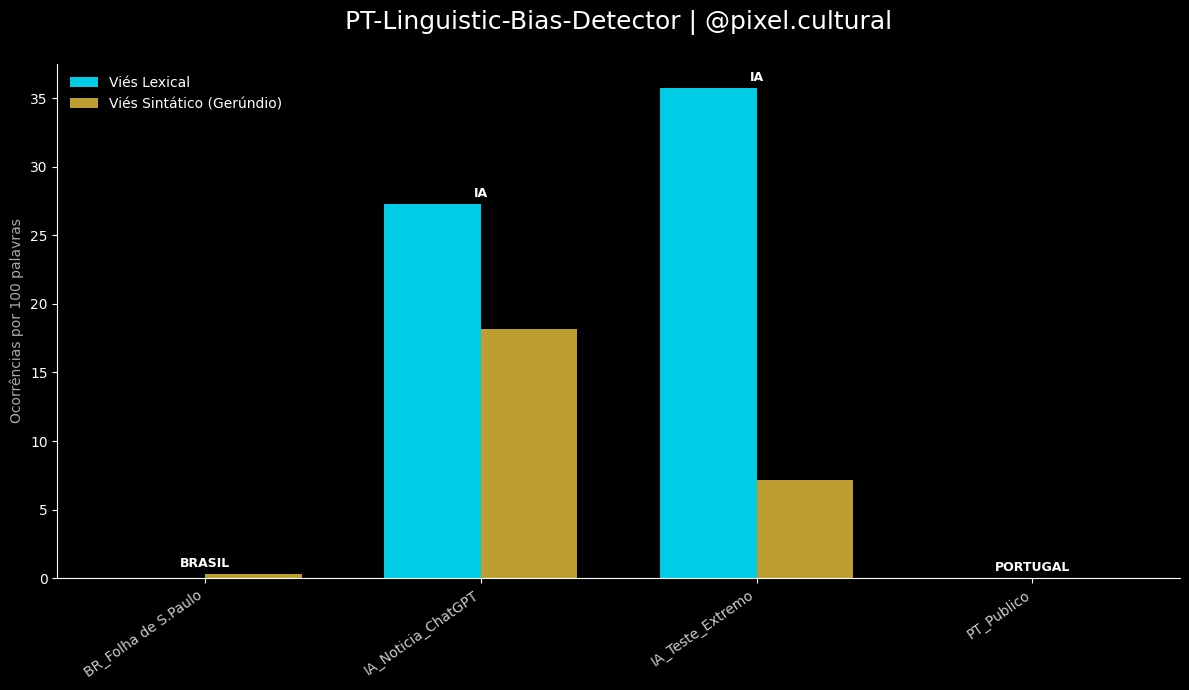

/tmp/ipython-input-487/2285391366.py:46: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.set_font('Helvetica', 'B', 16); self.cell(0, 10, 'Relatório de Variedade Linguística', 0, 1, 'C'); self.ln(10)


🚀 Dashboard e PDF Gerados!


In [5]:
def carregar_dicionario(caminho):
    df = pd.read_csv(caminho, encoding='utf-8')
    return {str(row.iloc[0]).strip().lower(): str(row.iloc[1]).strip().lower() for _, row in df.iterrows()}

bias_lexico = carregar_dicionario('dicionario_bias.csv')
nomes, b_vals, g_vals, categorias = [], [], [], []

for f_nome in sorted(os.listdir('corpus')):
    if f_nome.endswith('.txt'):
        with open(f'corpus/{f_nome}', 'r', encoding='utf-8') as f:
            b, g = analisar_texto(f.read(), bias_lexico)
            nome_limpo = f_nome.replace('.txt', '')
            nomes.append(nome_limpo)
            b_vals.append(b)
            g_vals.append(g)
            categorias.append("PORTUGAL" if "PT_" in nome_limpo else "BRASIL" if "BR_" in nome_limpo else "IA")

# --- GRÁFICO AESTHETIC ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(nomes))
largura = 0.35

ax.bar(x - largura/2, b_vals, largura, label='Viés Lexical', color='#00E5FF', alpha=0.9)
ax.bar(x + largura/2, g_vals, largura, label='Viés Sintático (Gerúndio)', color='#D4AF37', alpha=0.9)

# Anotações de Origem sobre as barras
for i, cat in enumerate(categorias):
    ax.text(i, max(b_vals[i], g_vals[i]) + 0.5, cat, ha='center', fontsize=9, fontweight='bold', color='white')

ax.set_ylabel('Ocorrências por 100 palavras', color='#AAAAAA')
ax.set_title('PT-Linguistic-Bias-Detector | @pixel.cultural', fontsize=18, pad=25, color='white')
ax.set_xticks(x)
ax.set_xticklabels(nomes, rotation=35, ha='right', color='#CCCCCC')
ax.legend(frameon=False, loc='upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('dashboard_aesthetic.png', dpi=300)
plt.show()

# --- GERAÇÃO DO PDF PROFISSIONAL ---
class PDF(FPDF):
    def header(self):
        self.set_font('Helvetica', 'B', 16); self.cell(0, 10, 'Relatório de Variedade Linguística', 0, 1, 'C'); self.ln(10)

pdf = PDF()
pdf.add_page()
pdf.image('dashboard_aesthetic.png', x=10, w=190)
pdf.ln(10)
pdf.set_font("Helvetica", 'B', 12)
pdf.cell(50, 10, "Origem", 1); pdf.cell(80, 10, "Ficheiro", 1); pdf.cell(30, 10, "Léxico %", 1); pdf.cell(30, 10, "Sintaxe %", 1); pdf.ln()
pdf.set_font("Helvetica", size=10)

for i in range(len(nomes)):
    pdf.cell(50, 10, categorias[i], 1)
    pdf.cell(80, 10, nomes[i][:25], 1)
    pdf.cell(30, 10, f"{b_vals[i]:.2f}", 1)
    pdf.cell(30, 10, f"{g_vals[i]:.2f}", 1); pdf.ln()

pdf.output("Relatorio_Final_Bias.pdf")
print("🚀 Dashboard e PDF Gerados!")

# **Melhorias Futuras e Notas de Investigação**

1. **Expansão do Corpus e Profundidade Linguística**
* *Escalabilidade do Dicionário:* O dicionário atual é uma prova de conceito. Pretende-se a integração com bases de dados lexicais robustas, como o Portal da Língua Portuguesa ou o Dicionário Aberto, para abranger arcaísmos e neologismos.

* *Análise de Sentimento Associada:* Implementar um módulo de análise de sentimento para verificar se o viés linguístico (PT-BR vs PT-PT) está correlacionado com tons emocionais específicos em notícias digitais.

2. **Refinamento do Motor de NLP**
* *Deteção de "Clichês" de IA:* Adicionar a deteção de expressões de transição e n-grams excessivamente utilizados por LLMs (ex: "Em suma", "É importante notar").

* *Modelos de Transformer:* Evoluir do modelo pt_core_news_sm para modelos baseados em BERT (como o BERTimbau ou o PT-BERT) para uma compreensão contextual e semântica mais profunda das frases.

3. **Auditoria de Modelos de Linguagem (LLMs)**
* *Benchmarking de Modelos:* Utilizar o sistema para auditar qual o modelo de IA (GPT-4, Claude, Gemini) produz o texto mais alinhado com a norma padrão do Português Europeu.

* *Análise Diacrónica:* Adaptar o código para analisar a evolução da escrita jornalística em Portugal ao longo das décadas, utilizando arquivos digitais como o do Diário de Notícias.

📌 **Notas Importantes para o Utilizador**
* *Limitações de Scraping:* Alguns portais de notícias utilizam paywalls ou protocolos de segurança que podem impedir o acesso automático via newspaper3k. Nesses casos, recomenda-se o upload manual do ficheiro .txt para a pasta corpus.

* *Rigor das Métricas:* Todas as métricas de densidade são normalizadas por cada 100 palavras para garantir que a comparação entre textos de diferentes extensões seja estatisticamente válida.